import significa “traer una herramienta externa al programa”.
numpy (abreviado como np) es una librería (un conjunto de herramientas) que permite trabajar con matemática avanzada, especialmente arreglos y matrices.

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.neighbors import LocalOutlierFactor

“sklearn” (scikit-learn) es una librería de inteligencia artificial y machine learning.

Dentro de ella está el módulo “neighbors”.

Dentro de “neighbors” está la clase LocalOutlierFactor, que es un algoritmo que sirve para detectar puntos raros, también llamados outliers.

¿Qué es un outlier?

Un dato que “se sale del grupo”, que está lejos de los demás. Por ejemplo, si todos pesan 70–80 kilos y alguien pesa 200, es un outlier.

In [5]:
np.random.seed(42)

Configura el generador de números aleatorios para que siempre produzca los mismos valores.

Porque si tu programa genera puntos al azar, no podrás repetir exactamente los mismos resultados cada vez que lo ejecutes.

Con seed(42) aseguramos:

siempre salen los mismos datos aleatorios

el ejemplo es reproducible

el gráfico no cambia cada vez

In [6]:
# Generamos los datos de entrenamiento

El símbolo # inicia un comentario, es decir: una nota para el humano, no para la computadora.

Aquí el comentario # Generamos los datos de entrenamiento No se ejecuta. Solo explica qué se hará en las siguientes líneas de codigo

In [7]:
X_inliers = 0.3* np.random.randn(100, 2)

np.random.randn(100,2) Es un generador de números aleatorios que siguen una distribución normal (también llamada campana de Gauss).

genera 100 filas cada una de las filas con 2 números los números siguen una distribución normal con media 0 y desviación estándar 1 ¿Por qué hacemos 0.3 * ...? Porque queremos que los puntos estén más juntos y centrados.

Multiplicar los valores aleatorios por 0.3:

reduce su tamaño

hace que el grupo de puntos sea más compacto

evita que se dispersen demasiado en el gráfico

Antes una fila: [-1.2 0.7] Después de multiplicar x 0.3: [-0.36 0.21]. Mucho más cerca del origen.

¿Qué significa X_inliers = ...? Estamos guardando los resultados en una variable llamada X_inliers.

El nombre viene de:

inlier → punto normal, punto dentro del grupo

lo contrario de outlier, que es un punto raro o externo

X_inliers es un grupo de 100 puntos normales, cada uno con 2 coordenadas (x, y).

Estos serán los datos “buenos” o “normales” del dataset.

In [8]:
#VER LA MATRIZ
print(X_inliers)



[[ 0.14901425 -0.04147929]
 [ 0.19430656  0.45690896]
 [-0.07024601 -0.07024109]
 [ 0.47376384  0.23023042]
 [-0.14084232  0.16276801]
 [-0.13902531 -0.13971893]
 [ 0.07258868 -0.57398407]
 [-0.51747535 -0.16868626]
 [-0.30384934  0.0942742 ]
 [-0.27240722 -0.42369111]
 [ 0.43969463 -0.06773289]
 [ 0.02025846 -0.42742446]
 [-0.16331482  0.03327678]
 [-0.34529807  0.11270941]
 [-0.18019161 -0.08750812]
 [-0.18051198  0.55568346]
 [-0.00404917 -0.31731328]
 [ 0.24676347 -0.36625309]
 [ 0.06265908 -0.58790104]
 [-0.39845581  0.05905837]
 [ 0.22153997  0.05141048]
 [-0.03469448 -0.09033111]
 [-0.4435566  -0.21595326]
 [-0.13819163  0.31713667]
 [ 0.10308549 -0.52891205]
 [ 0.09722519 -0.11552468]
 [-0.2030766   0.18350289]
 [ 0.30929986  0.27938404]
 [-0.25176526 -0.09276371]
 [ 0.09937903  0.29266354]
 [-0.14375227 -0.05569769]
 [-0.33190049 -0.35886199]
 [ 0.24375775  0.40687201]
 [-0.02160304  0.30105987]
 [ 0.10849081 -0.19353593]
 [ 0.10841868  0.46141097]
 [-0.01074781  0.4693931 ]
 

In [9]:
#VER LAS DIMENSIONES DE LA MATRIZ
X_inliers.shape

(100, 2)

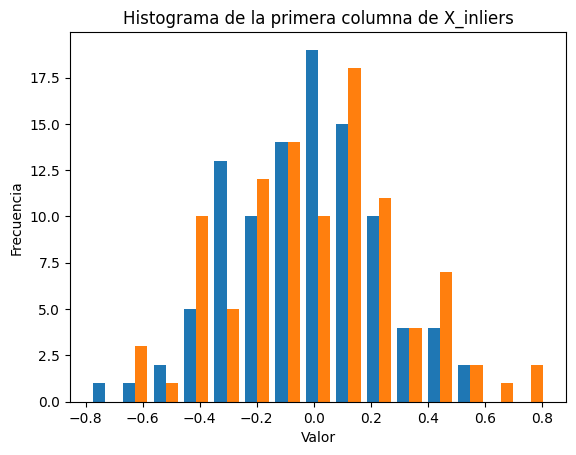

In [10]:
plt.hist(X_inliers[0:, :], bins=15)
plt.title("Histograma de la primera columna de X_inliers")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

21/11/2025 18:35 • np.random.randn(100,2) Es un generador de números aleatorios que siguen una distribución normal (también llamada campana de Gauss).
genera 100 filas
cada una de las filas con 2 números
los números siguen una distribución normal con media 0 y desviación estándar 1
¿Por qué hacemos 0.3 * ...? Porque queremos que los puntos estén más juntos y centrados.
Multiplicar los valores aleatorios por 0.3:
reduce su tamaño

hace que el grupo de puntos sea más compacto

evita que se dispersen demasiado en el gráfico
Antes una fila: [-1.2 0.7] Después de multiplicar x 0.3: [-0.36 0.21]. Mucho más cerca del origen.
¿Qué significa X_inliers = ...? Estamos guardando los resultados en una variable llamada X_inliers.
El nombre viene de:
inlier → punto normal, punto dentro del grupo

lo contrario de outlier, que es un punto raro o externo
X_inliers es un grupo de 100 puntos normales, cada uno con 2 coordenadas (x, y).
Estos serán los datos “buenos” o “normales” del dataset.

[[ 2.14901425  1.95852071]
 [ 2.19430656  2.45690896]
 [ 1.92975399  1.92975891]
 [ 2.47376384  2.23023042]
 [ 1.85915768  2.16276801]
 [ 1.86097469  1.86028107]
 [ 2.07258868  1.42601593]
 [ 1.48252465  1.83131374]
 [ 1.69615066  2.0942742 ]
 [ 1.72759278  1.57630889]
 [ 2.43969463  1.93226711]
 [ 2.02025846  1.57257554]
 [ 1.83668518  2.03327678]
 [ 1.65470193  2.11270941]
 [ 1.81980839  1.91249188]
 [ 1.81948802  2.55568346]
 [ 1.99595083  1.68268672]
 [ 2.24676347  1.63374691]
 [ 2.06265908  1.41209896]
 [ 1.60154419  2.05905837]
 [ 2.22153997  2.05141048]
 [ 1.96530552  1.90966889]
 [ 1.5564434   1.78404674]
 [ 1.86180837  2.31713667]
 [ 2.10308549  1.47108795]
 [ 2.09722519  1.88447532]
 [ 1.7969234   2.18350289]
 [ 2.30929986  2.27938404]
 [ 1.74823474  1.90723629]
 [ 2.09937903  2.29266354]
 [ 1.85624773  1.94430231]
 [ 1.66809951  1.64113801]
 [ 2.24375775  2.40687201]
 [ 1.97839696  2.30105987]
 [ 2.10849081  1.80646407]
 [ 2.10841868  2.46141097]
 [ 1.98925219  2.4693931 ]
 

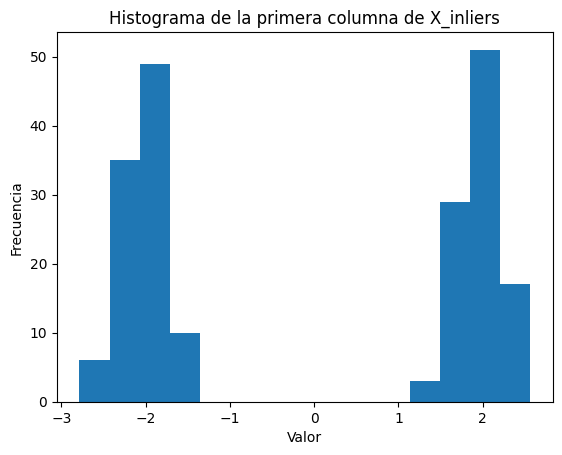

In [11]:
X_inliers2 = np.r_[X_inliers + 2, X_inliers - 2]
print(X_inliers2)

plt.hist(X_inliers2[:, 0], bins=15)
plt.title("Histograma de la primera columna de X_inliers")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

In [12]:
X_inliers2.shape

(200, 2)

Qué es X_inliers + 2?

A cada punto del arreglo, súmale 2 a las dos coordenadas:

Si un punto era: [-0.36, 0.21]. Entonces [-0.36 + 2, 0.21 + 2] = [1.64, 2.21]

PREGUNTA AL CURSO: ¿Qué es X_inliers - 2?

RESPUESTA: ¿Qué es X_inliers - 2? [-0.36, 0.21] → [-2.36, -1.79]

¿Qué hace np.r_[ ... , ... ]?

Es una función que une dos conjuntos de datos verticalmente.

Así: [ grupo desplazado +2 ] [ grupo desplazado -2 ]

Resultado: una sola matriz con 200 filas.

¿Por qué hacemos esto?

Generamos dos grupos de puntos “buenos”:

uno centrado alrededor de (2,2)

otro centrado alrededor de (-2,-2)

Estos dos grupos representarán datos normales.

[[ 3.01898458  1.92614894]
 [ 1.57612593  1.61987267]
 [-1.12407079 -1.65126525]
 [ 2.47488924  2.48090716]
 [ 2.93657855  3.30592442]
 [ 0.09073919  0.01213036]
 [ 2.38636143  1.19971145]
 [ 1.61573502  2.36634136]
 [ 3.12004273 -1.29603875]
 [-0.99533638 -3.24814448]
 [ 0.62624113 -3.71246181]
 [-0.27521585  0.34115708]
 [-1.70766998  0.72666608]
 [-3.755998   -3.70121449]
 [ 2.58080449 -1.11847487]
 [-2.9835159   0.17794608]
 [ 2.15994842 -2.27343178]
 [ 0.98312381 -3.31722028]
 [-3.58654623  0.25083705]
 [ 0.32508097  1.09943921]]


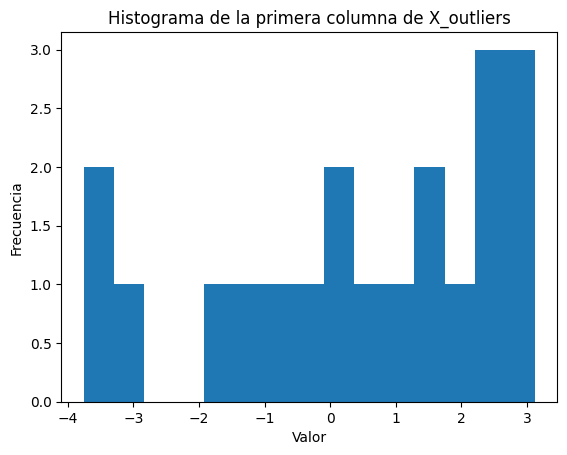

In [13]:

# Generamos algunos outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

print(X_outliers)

plt.hist(X_outliers[:, 0], bins=15)
plt.title("Histograma de la primera columna de X_outliers")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

¿Qué es np.random.uniform()?

Es un generador de números aleatorios que elige valores entre dos límites:

low=-4 significa el valor mínimo posible es −4

high=4 significa el valor máximo posible es 4

Es como decir:

“Elige números entre −4 y 4”.

¿Qué significa size=(20, 2)?

Vamos a generar 20 puntos, donde cada punto tiene 2 coordenadas (x, y)

Entonces crea una matriz así:

[ [valor, valor], [valor, valor], ... 20 veces ]

¿Por qué estos son outliers?

Porque estos puntos pueden caer en cualquier parte del cuadrado: x entre −4 y 4 y entre −4 y 4

Esto incluye puntos:

Lejos de los grupos normales

Totalmente dispersos

Con ubicaciones aleatorias

Son perfectos para representar “valores raros”.

In [14]:
X = np.r_[X_inliers2, X_outliers]
print(X)
X.shape

[[ 2.14901425  1.95852071]
 [ 2.19430656  2.45690896]
 [ 1.92975399  1.92975891]
 [ 2.47376384  2.23023042]
 [ 1.85915768  2.16276801]
 [ 1.86097469  1.86028107]
 [ 2.07258868  1.42601593]
 [ 1.48252465  1.83131374]
 [ 1.69615066  2.0942742 ]
 [ 1.72759278  1.57630889]
 [ 2.43969463  1.93226711]
 [ 2.02025846  1.57257554]
 [ 1.83668518  2.03327678]
 [ 1.65470193  2.11270941]
 [ 1.81980839  1.91249188]
 [ 1.81948802  2.55568346]
 [ 1.99595083  1.68268672]
 [ 2.24676347  1.63374691]
 [ 2.06265908  1.41209896]
 [ 1.60154419  2.05905837]
 [ 2.22153997  2.05141048]
 [ 1.96530552  1.90966889]
 [ 1.5564434   1.78404674]
 [ 1.86180837  2.31713667]
 [ 2.10308549  1.47108795]
 [ 2.09722519  1.88447532]
 [ 1.7969234   2.18350289]
 [ 2.30929986  2.27938404]
 [ 1.74823474  1.90723629]
 [ 2.09937903  2.29266354]
 [ 1.85624773  1.94430231]
 [ 1.66809951  1.64113801]
 [ 2.24375775  2.40687201]
 [ 1.97839696  2.30105987]
 [ 2.10849081  1.80646407]
 [ 2.10841868  2.46141097]
 [ 1.98925219  2.4693931 ]
 

(220, 2)

In [15]:
n_outliers = len(X_outliers)
print(n_outliers)

20


In [16]:
ground_truth = np.ones(len(X), dtype=int)
print(ground_truth)
ground_truth.shape

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


(220,)

len(X) → cuenta todos los puntos (inliers + outliers).

200 inliers

20 outliers

total = 220

np.ones(...) → crea un arreglo lleno de unos. [1, 1, 1, 1, 1, 1, ...]

dtype=int → asegura que sean números enteros.

POR QUÉ LO HACEMOS?

Estamos creando un arreglo que dice:

1 = punto normal (inlier)

−1 = punto raro (outlier)

Por ahora marcamos todos como normales, pero en la siguiente línea corregiremos eso.

In [17]:
ground_truth[-n_outliers:] = -1

print(ground_truth)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


ground_truth es una lista de 1s: [1, 1, 1, 1, ... 1]

-n_outliers: significa: “las últimas n_outliers posiciones”, o sea, los últimos 20 elementos

Si hay 220 datos: tomamos los elementos 200 al 219 y les ponemos −1

In [18]:
# Aquí vamos a entrenar el modelo para detectar puntos raros
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

print(clf)

LocalOutlierFactor(contamination=0.1)


¿Qué es LocalOutlierFactor?

Es un algoritmo que permite detectar puntos anormales analizando:

-qué tan cerca están de sus vecinos -qué tan denso es su “vecindario” -si están aislados o lejos del grupo principal

Es como observar: “Si un punto está solo, o alejado del grupo, probablemente es raro”.

¿Qué significa n_neighbors=20?

Este parámetro le dice al modelo: “Para decidir si un punto es raro, compáralo con sus 20 vecinos más cercanos”. Si un punto: está mucho más lejos de esos 20 vecinos o tiene un vecindario poco denso entonces LOF lo marcará como outlier.

¿Qué significa contamination=0.1?

Este parámetro indica: “Aproximadamente el 10% de los datos se espera que sean outliers”. Como tenemos: 200 puntos normales 20 puntos raros total = 220

20/220 = 0.09 → ~10%

El valor 0.1 es una buena aproximación.

OJO: Si no se especifica, LOF intenta estimarlo automáticamente, pero aquí lo indicamos manualmente.

In [19]:
#Usaremos fit_predict para obtener las etiquetas (normal u outlier).
#LOF no permite predecir sobre datos nuevos cuando se usa como detector de outliers.
#LOF estudia densidades locales del conjunto completo
#Si le damos un nuevo punto, no sabe dónde encajarlo
#Para eso existe un modo especial llamado novelty=True (pero aquí no lo usaremos)
y_pred = clf.fit_predict(X)

print(y_pred)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


continuación del código

In [20]:
#tomamos el y_pred calculado anteriormente
#y_pred != ground_truth compara posición por posición las dos listas
#si la predicción es igual al truth da false
#si la predicción es diferente al truth es true
#usamos sum para contar cuantas veces se equivocó el modelo
n_errors = (y_pred != ground_truth).sum()
print(n_errors)

8


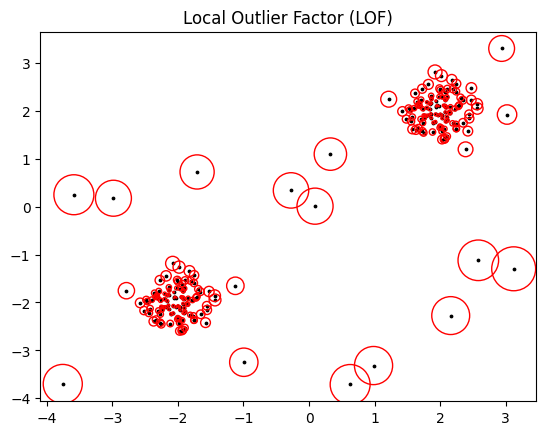

In [21]:
n_errors = (y_pred != ground_truth).sum()
#clf.negative_outlier_factor_ para cada punto de los datos, crea un resultado interno 
#que el modelo guarda despues de ajustarse a los datos
#en general es como un factor de rareza
X_scores = clf.negative_outlier_factor_

#en esta parte se crea el grafico con la libreria matplotlib
# ponemos el título al gráfico
plt.title("Local Outlier Factor (LOF)")
# Dibujamos los puntos originales del conjunto de datos X
#damos formato color='k' significa negro (black)
# s=3. tamaño  pequeño del punto

sc_points = plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Puntos de datos')
sc_points
# Calculamos un radio para cada punto en base a X_scores (los puntajes LOF)
#max maximo, min -minimo
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

# Dibujamos círculos alrededor de cada punto
# Usamos las mismas coordenadas X[:, 0] y X[:, 1]
# s=1000 * radius -> el tamaño del círculo depende del "radius"

sc_circles = plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
sc_circles

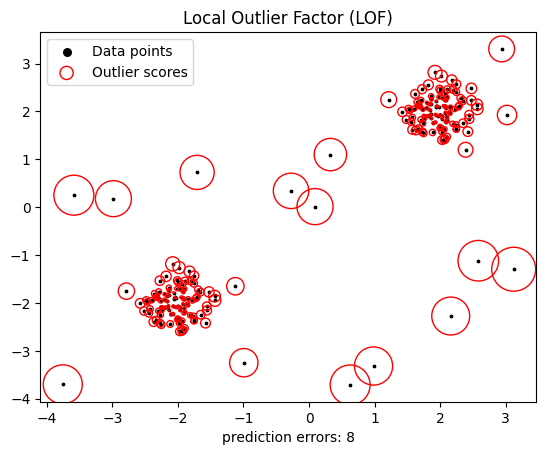

In [ ]:
#título del gráfico
plt.title("Local Outlier Factor (LOF)")
# Dibujamos los puntos originales y guardamos el gráfico en sc_points
sc_points = plt.scatter(
    X[:, 0], X[:, 1],
    color='k',
    s=3,
    # Nombre que aparecerá en la leyenda para estos puntos
    label='Data points'
)

# Calculamos un valor de "radio" entre 0 y 1 según qué tan raro es cada punto
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
# Dibujamos círculos alrededor de cada punto, con tamaño según el radio
sc_circles = plt.scatter(
    X[:, 0], X[:, 1],
    # El tamaño del círculo es 1000 veces el radio (para que se note)
    s=1000 * radius,
    edgecolors='red',
    facecolors='none',
    label='Outlier scores'
)


plt.autoscale()

plt.xlabel(f"prediction errors: {n_errors}")

# Creamos la leyenda usando solo estos dos objetos gráficos
leg = plt.legend(handles=[sc_points, sc_circles],
                 labels=['Data points', 'Outlier scores'],
                 loc='upper left')

leg.legend_handles[0].set_sizes([30])
leg.legend_handles[1].set_sizes([90])

plt.show()

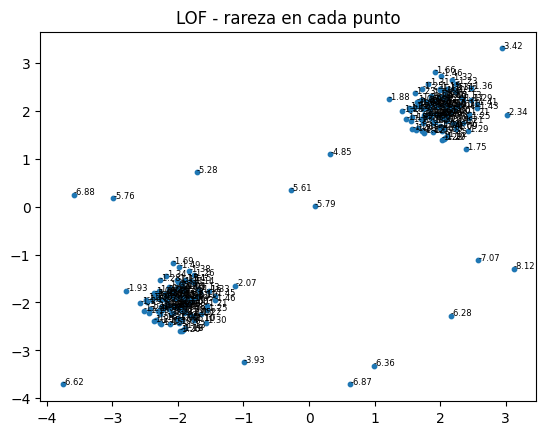

In [ ]:
#esta gráfica muestra, los valores de x_scores para darnos una mejor idea de
#que los valores mayores, son outliers y los menores son valores "inliers"
plt.figure()

# Puntos
plt.scatter(X[:, 0], X[:, 1], s=10)

# Texto con el score en cada punto
for x, y, score in zip(X[:, 0], X[:, 1], X_scores):
    plt.text(x, y, f"{score:.2f}", fontsize=6)

plt.title("LOF - rareza en cada punto")
plt.show()
